**Table of contents**<a id='toc0_'></a>    
- [Getting Started with Machine Learning](#toc1_)    
  - [Saving and Load Model](#toc1_1_)    
    - [Save](#toc1_1_1_)    
    - [Load](#toc1_1_2_)    
- [Taking a look at some machine learning algorithms](#toc2_)    
  - [Train Test Split](#toc2_1_)    
  - [KNN Algorithm [K-Nearest Neighbors]](#toc2_2_)    
- [SVM [Support Vector Machine]](#toc3_)    
  - [Linear Regression](#toc3_1_)    
  - [K-Mean Clustering [K-Means]](#toc3_2_)    
  - [Handwritten Digit Recognition](#toc3_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Getting Started with Machine Learning](#toc0_)

## <a id='toc1_1_'></a>[Saving and Load Model](#toc0_)

### <a id='toc1_1_1_'></a>[Save](#toc0_)

In [ ]:
from sklearn.externals import joblib
#clf.fit(X_train, y_train)
filename = 'model.sav'
joblib.dump(clf, filename)

### <a id='toc1_1_2_'></a>[Load](#toc0_)

In [ ]:
from sklearn.externals import joblib

joblib.load('model.sav')

# <a id='toc2_'></a>[Taking a look at some machine learning algorithms](#toc0_)

## <a id='toc2_1_'></a>[Train Test Split](#toc0_)

In [2]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

In [19]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [18]:
X.shape, y.shape

((150, 4), (150,))

In [22]:
# Test and Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## <a id='toc2_2_'></a>[KNN Algorithm [K-Nearest Neighbors]](#toc0_)
- https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
- weight parameter {
    - uniform: all points in each neighborhood are weighted equally
    - distance: weights closer neighbors more heavily than further neighbors}

In [65]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [66]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv('car_evaluation_data/car.data', names=columns)

In [67]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [68]:
X = data[['buying', 'maint', 'safety']].values
y = data['class']

In [69]:
# Convert X into numeric Using Label Encoder
encoder = LabelEncoder()
for i in range(len(X[0])):
    X[:, i] = encoder.fit_transform(X[:, i])

In [70]:
# Converting y into numeric Using mapping
label_mapping = {"unacc": 0, "acc": 1, "good": 2, "vgood": 3}
y = y.map(label_mapping)
y = np.array(y)

In [73]:
# Separate the data into train and split with 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
# Create Model
knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [75]:
# Predictions
prediction = knn.predict(X_test)

In [77]:
# Evaluate
accuracy = metrics.accuracy_score(y_test, prediction)
print('prediction: ', prediction)
print('accuracy: ', accuracy)

prediction:  [0 1 1 0 1 0 0 0 0 0 0 0 0 1 2 0 1 0 0 0 0 0 2 0 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 3 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 0 3 1 0 0 3 1 1 0 0 0 0 0 3 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 3 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 2 1 0 0 0 0 0 0 0 0 0 3 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 2 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1
 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 1 0 0 1 0 2 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 1 0 0 1 1 0 2 0 0 1 0 0 1 1 0 0 0 2 3 1 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0]
accuracy:  0.7341040462427746


In [81]:
print('Actual values :', y[20])
print('Predicted values :', knn.predict(X)[20])

Actual values : 0
Predicted values : 0


# <a id='toc3_'></a>[SVM [Support Vector Machine]](#toc0_)
- https://scikit-learn.org/stable/modules/svm.html
- Kernel : {
    - linear (default)
    - poly 
    - rbf
    - sigmoid
}

In [18]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [6]:
iris = datasets.load_iris()

In [7]:
X = iris.data
y = iris.target
classes = ['Iris Setosa', 'Iris Versicolor', ' Iris Virginaca']

In [11]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Create model and fit the model
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [21]:
# Predict
prediction = model.predict(X_test)

In [23]:
# Evaluate
accuracy = accuracy_score(y_test, prediction)
print('Accuracy :', accuracy)

Accuracy : 0.9666666666666667


In [27]:
# Can test for every value
print('predict : ', model.predict(X)[2])
print('true value :', y[2])

predict :  0
true value : 0


## <a id='toc3_1_'></a>[Linear Regression](#toc0_)

In [74]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
boston = datasets.load_boston()

In [32]:
X = boston.data
y = boston.target

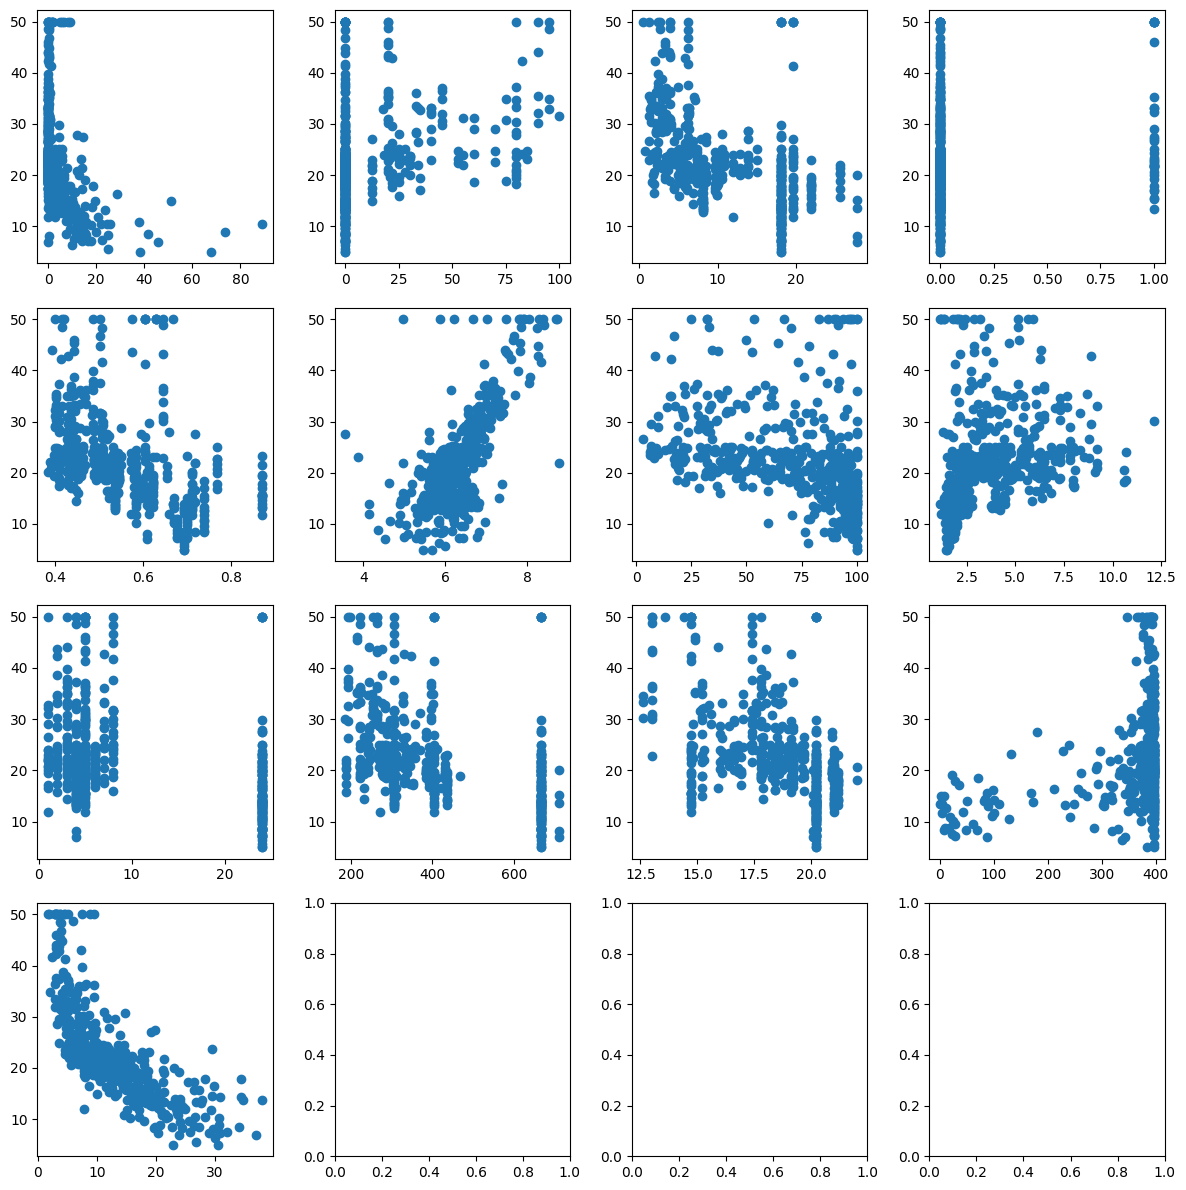

In [55]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(12, 12))

for i in range(len(X[0])):
    row = i // 4
    col = i % 4
    axs[row, col].scatter(X.T[i], y)

plt.tight_layout()
plt.show()

In [35]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [38]:
# Build a model and fit the model
l_reg = linear_model.LinearRegression()
l_reg.fit(X_train, y_train)

LinearRegression()

In [76]:
# Evaluate
prediction = l_reg.predict(X_test)
print('R^2 Score: ', r2_score(y_test, prediction))
print('MAE : ', mean_absolute_error(y_test, prediction))
print('Coefficient: ', l_reg.coef_)
print('Intercept : ', l_reg.intercept_)

R^2 Score:  0.7643040275153903
MAE :  3.601230807162385
Coefficient:  [-8.96491252e-02  4.88115890e-02  2.53938250e-03  2.12601045e+00
 -1.39732185e+01  3.66771548e+00 -4.80482180e-03 -1.43756569e+00
  2.66427168e-01 -1.29949869e-02 -8.15172375e-01  9.73285660e-03
 -5.07194370e-01]
Intercept :  33.25963501976742


## <a id='toc3_2_'></a>[K-Mean Clustering [K-Means]](#toc0_)

In [105]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np

In [106]:
bc = load_breast_cancer() ;bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [107]:
X = bc.data
y = bc.target
print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [108]:
# Scale X data because it's on different range of data
X = scale(bc.data) ;X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [109]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
# Number of label
n_cluster = len(np.unique(y_train))

In [111]:
# Create Model 
model = KMeans(n_clusters=n_cluster, random_state=0)

In [112]:
# Fit the Model
model.fit(X_train)

KMeans(n_clusters=2, random_state=0)

In [113]:
# Make predictions
predictions = model.predict(X_test)

In [114]:
labels = model.labels_

In [115]:
print('labels', labels)
print('predictions', predictions)
print('Actual Values', y_test)
print('accuracy', accuracy_score(y_test, predictions))

labels [1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0
 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1
 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1
 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1
 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1
 1 0 1 1 1 1 1 0 0 0 1]
predictions [1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 

In [116]:
print(pd.crosstab(y_train, labels))

col_0    0    1
row_0          
0      142   30
1       14  269


## <a id='toc3_3_'></a>[Handwritten Digit Recognition](#toc0_)

In [148]:
import mnist
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [149]:
# training variable
X_train, X_test, y_train, y_test = mnist.train_images(), mnist.test_images(), mnist.train_labels(), mnist.test_labels()

In [150]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [151]:
# How much dimension in the data
print(X_train.ndim)

3


In [152]:
# Reshape the data
X_train = X_train.reshape((-1, 28*28))
X_test = X_test.reshape((-1, 28*28))
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [153]:
print(np.unique(X_train))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [154]:
# Rescale the data into 0-1
X_train = (X_train/256)
X_test = (X_test/256)
print(np.unique(X_train))

[0.         0.00390625 0.0078125  0.01171875 0.015625   0.01953125
 0.0234375  0.02734375 0.03125    0.03515625 0.0390625  0.04296875
 0.046875   0.05078125 0.0546875  0.05859375 0.0625     0.06640625
 0.0703125  0.07421875 0.078125   0.08203125 0.0859375  0.08984375
 0.09375    0.09765625 0.1015625  0.10546875 0.109375   0.11328125
 0.1171875  0.12109375 0.125      0.12890625 0.1328125  0.13671875
 0.140625   0.14453125 0.1484375  0.15234375 0.15625    0.16015625
 0.1640625  0.16796875 0.171875   0.17578125 0.1796875  0.18359375
 0.1875     0.19140625 0.1953125  0.19921875 0.203125   0.20703125
 0.2109375  0.21484375 0.21875    0.22265625 0.2265625  0.23046875
 0.234375   0.23828125 0.2421875  0.24609375 0.25       0.25390625
 0.2578125  0.26171875 0.265625   0.26953125 0.2734375  0.27734375
 0.28125    0.28515625 0.2890625  0.29296875 0.296875   0.30078125
 0.3046875  0.30859375 0.3125     0.31640625 0.3203125  0.32421875
 0.328125   0.33203125 0.3359375  0.33984375 0.34375    0.3476

In [155]:
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(64,64))

In [156]:
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 64))

In [157]:
predictions = clf.predict(X_test)

In [158]:
acc = confusion_matrix(y_test, predictions)

In [159]:
print(acc)

[[ 969    0    0    1    0    3    4    1    2    0]
 [   0 1125    3    1    0    0    1    1    4    0]
 [   3    2 1009    5    3    0    0    5    4    1]
 [   0    0    5  989    0    6    0    4    2    4]
 [   2    0    3    0  960    0    4    4    1    8]
 [   4    1    0    8    1  864    3    0    8    3]
 [   5    1    1    1    6    4  938    0    2    0]
 [   3    3    5    4    2    0    0 1004    4    3]
 [   4    0    2    1    5    4    2    2  950    4]
 [   1    2    0    4    8    6    0    4    5  979]]


In [164]:
def accuracy(cm):
    diagonal = cm.trace()
    elements = cm.sum()
    print(diagonal)
    print(elements)
    return diagonal/elements

In [165]:
print(accuracy(acc))

9787
10000
0.9787
